<a href="https://colab.research.google.com/github/Jasjot-Kaur/MLPractice_TitanicSurvivalPrediction_using_LogisticRegression/blob/main/MLPractice_TitanicSurvivalPrediction_using_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary Classification_Titanic**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/AlmaBetter/Logistic Regression_Classification Modelling/Titanic.xlsx')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

Some of the columns aren’t relevant to a machine-learning model, such as “PassengerId” and “Name.” Others are very relevant. The ones we’ll focus on are:

* Survived, which indicates whether the passenger survived the voyage (1) or did 
not (0)
* Pclass, which indicates whether the passenger was traveling in first class (1), second class (2), or third class (3)
* Sex, which indicates the passenger’s gender
* Age, which indicates the passenger’s age

The “Survived” column is the label column – the one we’ll try to predict. The other columns are relevant because first-class passengers were more likely to have survived the sinking, and women and children were more likely to be given space in lifeboats.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The “Cabin” column is missing a lot of values, but we don’t care since we’re not using that column. We are going to use the “Age” column, and that column is missing some values as well. We could replace the missing values with the mean of all the other ages, but we’ll take the simpler approach of removing rows with missing values. Use the following statements to remove the columns that we don’t need, drop rows with missing values, and one-hot-encode the values in the “Sex” and “Pclass” columns:

In [ ]:
df = df[['Survived', 'Age', 'Sex', 'Pclass']]                 # selecting the specific columns to be contained in the dataset

In [ ]:
df = pd.get_dummies(df, columns = ['Sex', 'Pclass'])          # one-hot-encoding using get_dummies function

In [ ]:
df.dropna(inplace = True)                                     # removing the null values from the datset

In [ ]:
df.head()

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,1,26.0,1,0,0,0,1
3,1,35.0,1,0,1,0,0
4,0,35.0,0,1,0,0,1


The next task is to split the dataset for training and testing:

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(['Survived'], axis = 1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 0)

Note the stratify=y parameter passed to train_test_split. That’s important, because of the 714 samples remaining after rows with missing values are removed, 290 represent passengers who survived, and 424 represent passengers who did not. We want the training dataset and the test dataset to contain similar proportions of both classes, and stratify=y accomplishes that. Without stratification, the model might appear to be more or less accurate than it really is.

Now create a logistic-regression model, train it with the data split off for training, and score it with the test data:



In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8321678321678322

Score the model again using cross-validation so we have more confidence in the score:

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, cv = 5).mean()

0.7857480547621394

Use the following statements to display a confusion matrix showing precisely how the model performed during testing:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


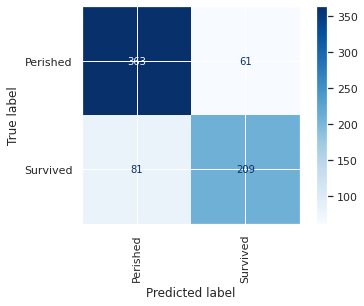

In [ ]:
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, x, y, display_labels=['Perished', 'Survived'], cmap = 'Blues', xticks_rotation = 'vertical')

Finally, visualize the model’s accuracy by plotting an ROC curve:

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


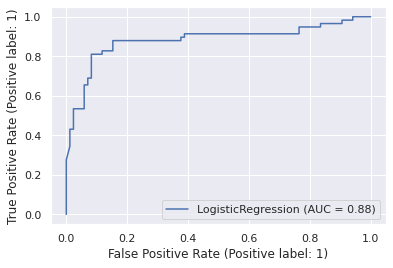

In [ ]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, x_test, y_test)

Now let’s use the trained model to make some predictions. First, let’s find out whether a 30-year female traveling in first class is likely to survive the voyage:

In [ ]:
female = [[30, 1, 0 , 1, 0, 0]]
model.predict(female)[0]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

The model predicts that she will survive, but what are the odds that she we will survive?

In [ ]:
probability = model.predict_proba(female)[0][1]
print(f'Probabilit of survival: {probability: .1%}')

Probabilit of survival:  91.6%


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


A 30-year-old female traveling in first class is more than 90% likely to survive the voyage, but what about a 60-year-old male traveling in third class?

In [ ]:
male = [[60, 0, 1 , 0, 0, 1]]
probability = model.predict_proba(male)[0][1]
print(f'Probabilit of survival: {probability: .1%}')

Probabilit of survival:  2.9%


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


A 60 year old male travlling in third-class only has 3% survival probability.

How likely, for example, is a 12-year-old male traveling in second class to survive the sinking of the Titanic?

In [ ]:
male = [[12, 0, 1 , 0, 1, 0]]
probability = model.predict_proba(male)[0][1]
print(f'Probabilit of survival: {probability: .1%}')

Probabilit of survival:  40.1%


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


A 12 year old boy travlling in second-class only has 40% survival probability.